### Brain-hacking 101

Author: [**Ariel Rokem**](http://arokem.org), [**The University of Washington eScience Institute**](http://escience.washington.edu)

### Hack 4: interact with the data
To get a sense of your data, one of the best things you can do is to interactively explore the patterns in your data. 
While building full-fledged interactive applications that do more than one thing is rather hard, it is possible to build small interactive data-exploration tools, that do just one thing, with only a few lines of code. Here, we'll show how to do that using `IPython`'s interactive widget system. We will demonstrate this below

In [1]:
import numpy as np
import nibabel as nib
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
mpl.style.use('bmh')

In [2]:
img = nib.load('./data/run1.nii.gz')
data = img.get_data()

In [3]:
import scipy.signal as sps

In [4]:
tsnr = np.mean(data, -1) / np.std(data, -1)


In [5]:
def plot_tsnr(x=data.shape[0]/2, y=data.shape[1]/2, z=data.shape[2]/2):
    fig, axes = plt.subplots(2, 2)
    ax = axes[0, 0]
    ax.axis('off')
    ax.matshow(tsnr[:, :, z], cmap=mpl.cm.hot)
    ax = axes[0, 1]
    ax.axis('off')
    ax.matshow(np.rot90(tsnr[:, y, :]), cmap=mpl.cm.hot)
    ax = axes[1, 0]
    ax.axis('off')
    ax.matshow(np.rot90(tsnr[x, :, :]), cmap=mpl.cm.hot)
    ax = axes[1, 1]
    ax.plot(data[x, y, z])
    ax.set_xlabel('Time')
    ax.set_ylabel('FMRI signal  (a.u.)')
    fig.set_size_inches(10, 10)
    return fig

In [9]:
import ipywidgets as wdg
import IPython.display as display

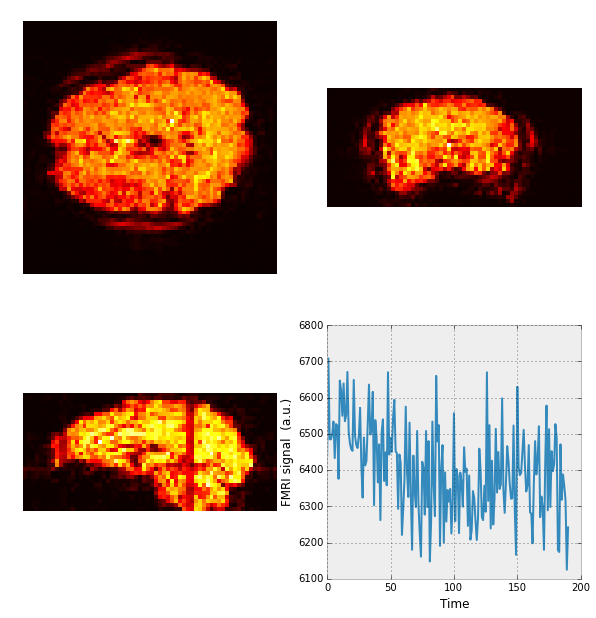

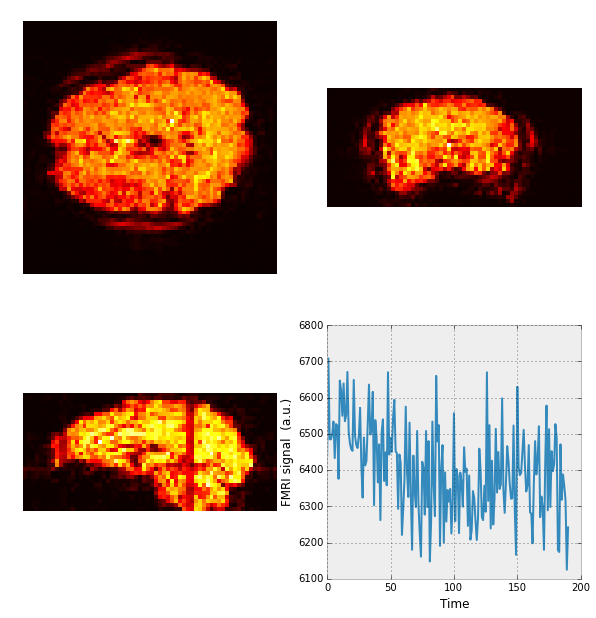

In [8]:
pb_widget = wdg.interactive(plot_tsnr, 
                            x=wdg.widget_int.IntSlider(min=1, max=data.shape[0], value=data.shape[0]//2),
                            y=wdg.widget_int.IntSlider(min=1, max=data.shape[1], value=data.shape[1]//2),
                            z=wdg.widget_int.IntSlider(min=1, max=data.shape[2], value=data.shape[2]//2)
                            )
display.display(pb_widget)